# Computing network density measures

Learning goals:
        
1. Familiarizing yourself with density measures
2. Computing density measures in Python/NetworkX
3. Communicating network density measures        

## Loading modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import networkx as nx
from collections import Counter

## Generate a small-world network with

In [2]:
g = nx.barabasi_albert_graph(n=500, m=5)

## Get network density metrics

### Get node degree

In [3]:
nd = [v for k, v in g.degree()]

### Average degree

In [4]:
k = np.mean(nd)

### Degree distribution

In [5]:
# get the cardinality of the degree distribution
dd = Counter(nd)

### Connectivity

In [6]:
# test if 'g' is connected
connected = nx.is_connected(g)
# get the number of connected components
connected_comps = nx.number_connected_components(g)

### Clustering

In [7]:
# node clustering
cl = nx.clustering(g)
# average node clustering
ave_cl = nx.average_clustering(g)

## Present the results

/var/folders/54/ffslxghn48n3xk51ftrn_63cmjsv6g/T/ipykernel_16922/1670598147.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(


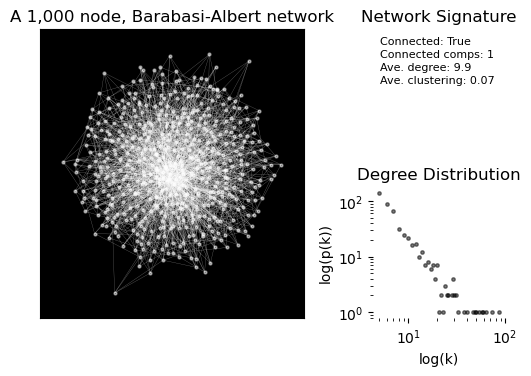

In [71]:
# create a figure
fig = plt.figure(figsize=(6, 3.75))
# arrange the figure around a grid
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[2, 1], height_ratios=[1, 1])
# the plots
ax0 = plt.subplot(gs[0:2, 0])
ax0.set_title("A 1,000 node, Barabasi-Albert network")
ax1 = plt.subplot(gs[0, 1])
ax1.set_title("Network Signature")
ax2 = plt.subplot(gs[1, 1])
ax2.set_title("Degree Distribution")
# draw the network
ax0.set_facecolor("black")
pos = nx.spring_layout(g)
options = {
    "node_color": "white",
    "alpha": 0.5,
    "node_size": 4,
    "width": 0.2,
    "edge_color": "white",
    "with_labels": False,
}
nx.draw_networkx(g, pos=pos, ax=ax0, **options)
# information about the network
ax1.axis("off")
ax1.text(
    0.05, 0.95, "Connected: {}".format(connected), fontsize=8, verticalalignment="top"
)
ax1.text(
    0.05,
    0.85,
    "Connected comps: {}".format(connected_comps),
    fontsize=8,
    verticalalignment="top",
)
ax1.text(0.05, 0.75, "Ave. degree: {}".format(k), fontsize=8, verticalalignment="top")
ax1.text(
    0.05,
    0.65,
    "Ave. clustering: {}".format(np.round(ave_cl, 2)),
    fontsize=8,
    verticalalignment="top",
)
# draw the degree distribution
ax2.scatter(dd.keys(), dd.values(), color="k", alpha=0.5, s=6)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlabel("log(k)")
ax2.set_ylabel("log(p(k))")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)
# spacing
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=None
)
# set the axis off
plt.savefig(
    "../../beamers/networksAndValue/bridgingTies/images/network_density_sum.pgf",
    bbox_inches="tight",
    pad=2,
)
